#**CNN Implementation on MNIST Dataset**

##Importing Libraries

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

## Loading MNIST training and test data set

In [ ]:
(X_tr, y_tr), (X_te, y_te) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##Data Exploration

In [ ]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
print(type(X_tr))
print(type(X_te))
print(type(y_tr))
print(type(y_te))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
import numpy as np
np.unique(X_te)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
np.unique(X_tr)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
np.unique(y_tr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(y_te)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

##Data Visualization : Plotting the first 9 samples from the train dataset.

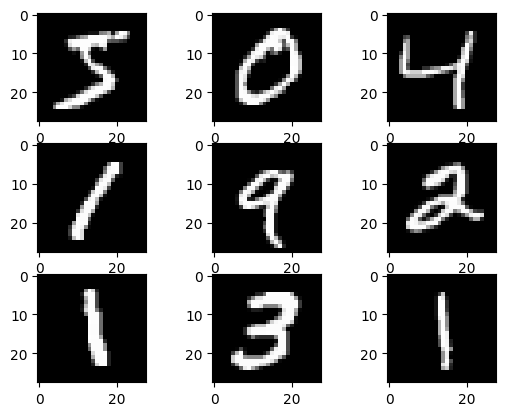

In [ ]:
for i in range(9):
	plt.subplot(3,3,i+1)
	plt.imshow(X_tr[i], cmap=plt.get_cmap('gray'))
plt.show()

##Reshaping the image data to convert to single channel

In [ ]:
X_tr = X_tr.reshape((X_tr.shape[0], 28, 28, 1))
X_te = X_te.reshape((X_te.shape[0], 28, 28, 1))

##One hot encoding target values

In [ ]:
from keras.utils import to_categorical
y_tr = to_categorical(y_tr)
y_te = to_categorical(y_te)

##Reshaped data dimension

In [ ]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


##Normalizing: Since the grayscale image data contains pixel intensities of(0-255) hence dividing by 255 to convert range within(0-1)

In [ ]:
train_norm = X_tr.astype('float32')
test_norm = X_te.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

##Importing required libraries for model formation

In [ ]:
import tensorflow
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam, SGD

##Building the Model

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, activation = 'relu', input_shape=(28, 28, 1), kernel_size=(3, 3), strides=(1, 1), padding='valid'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=32,  activation = 'relu', kernel_size=(3, 3), strides=(1, 1), padding='valid',kernel_regularizer = regularizers.l2( l=0.01)))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64,  activation = 'relu', kernel_size=(3, 3), strides=(1, 1), padding='valid', kernel_regularizer = regularizers.l2( l=0.01)))

# 4th Convolutional Layer
model.add(Conv2D(filters=64,  activation = 'relu', kernel_size=(3, 3), strides=(1, 1), padding='valid', kernel_regularizer = regularizers.l2( l=0.01)))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(512,  activation = 'relu'))

#Dropout to prevent overfitting
model.add(Dropout(0.25))

# Output Layer
# Dense 10 because we have 10 classes(0-9)
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Model shape

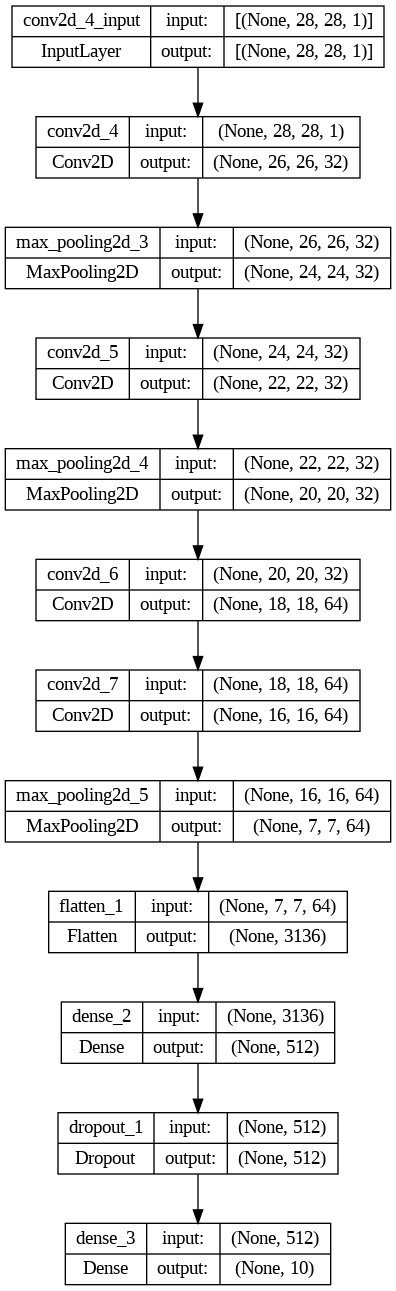

In [ ]:
tensorflow.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

##Training model

In [ ]:
history = model.fit(
    train_norm, y_tr, epochs=11, batch_size=64, validation_data=(test_norm, y_te),
)

Epoch 1/11
938/938 [==============================] - 365s 387ms/step - loss: 0.3752 - accuracy: 0.9489 - val_loss: 0.1149 - val_accuracy: 0.9830
Epoch 2/11
938/938 [==============================] - 337s 359ms/step - loss: 0.1207 - accuracy: 0.9764 - val_loss: 0.0888 - val_accuracy: 0.9831
Epoch 3/11
938/938 [==============================] - 336s 359ms/step - loss: 0.0924 - accuracy: 0.9814 - val_loss: 0.0763 - val_accuracy: 0.9845
Epoch 4/11
938/938 [==============================] - 331s 353ms/step - loss: 0.0827 - accuracy: 0.9832 - val_loss: 0.0648 - val_accuracy: 0.9874
Epoch 5/11
938/938 [==============================] - 330s 352ms/step - loss: 0.0735 - accuracy: 0.9855 - val_loss: 0.0581 - val_accuracy: 0.9894
Epoch 6/11
938/938 [==============================] - 330s 352ms/step - loss: 0.0686 - accuracy: 0.9857 - val_loss: 0.0652 - val_accuracy: 0.9863
Epoch 7/11
938/938 [==============================] - 340s 362ms/step - loss: 0.0656 - accuracy: 0.9859 - val_loss: 0.0626 -

##Train vs Validation loss

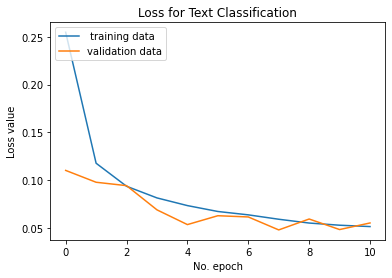

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

##Train vs Validation Accuracy

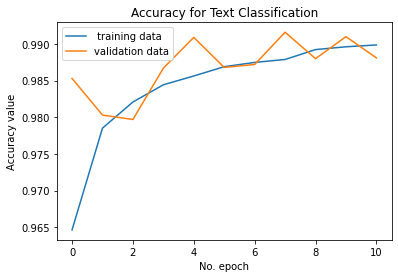

In [ ]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

##Results Evaluation

In [ ]:
results_tr = model.evaluate(train_norm,y_tr)
results_te = model.evaluate(test_norm,y_te)

313/313 [==============================] - 14s 44ms/step - loss: 0.0555 - accuracy: 0.9881


##Train vs Test Accuracy and Loss

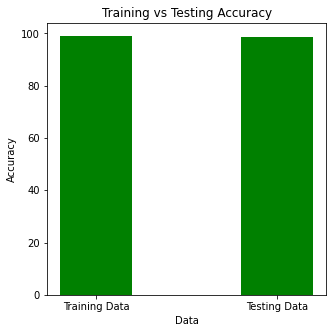

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Training Data':99.06, 'Testing Data':98.81}
xaxis = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(xaxis, values, color ='green',
        width = 0.4)

plt.xlabel("Data")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.show()

##Training vs Testing Loss

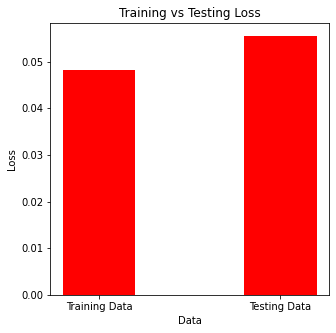

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Training Data':0.0482, 'Testing Data':0.0555}
xaxis = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(xaxis, values, color ='red',
        width = 0.4)

plt.xlabel("Data")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.show()

##Classification Result

In [ ]:
preds = np.round(model.predict(test_norm),0)

313/313 [==============================] - 14s 45ms/step


In [ ]:
print("rounded test labels",preds)

rounded test labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_te, preds)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_te, preds)

In [ ]:
cm

array([[[9013,    7],
        [   3,  977]],

       [[8863,    2],
        [  25, 1110]],

       [[8958,   10],
        [   8, 1024]],

       [[8971,   19],
        [   7, 1003]],

       [[9013,    5],
        [  20,  962]],

       [[9099,    9],
        [   9,  883]],

       [[9034,    8],
        [  16,  942]],

       [[8954,   18],
        [   8, 1020]],

       [[9010,   16],
        [  10,  964]],

       [[8978,   13],
        [  23,  986]]])

##Finding indices of Misclassified Samples

In [ ]:
temp = []
for i in range(0,10000):
  temp.append(np.array_equal(preds[i],y_te[i]))

In [ ]:
x = {k:v for k,v in enumerate(temp) if v == False}

In [ ]:
x

{209: False,
 247: False,
 259: False,
 321: False,
 447: False,
 449: False,
 497: False,
 582: False,
 619: False,
 625: False,
 659: False,
 674: False,
 684: False,
 720: False,
 881: False,
 882: False,
 900: False,
 947: False,
 956: False,
 1014: False,
 1039: False,
 1044: False,
 1182: False,
 1226: False,
 1242: False,
 1247: False,
 1260: False,
 1393: False,
 1414: False,
 1459: False,
 1527: False,
 1530: False,
 1681: False,
 1709: False,
 1737: False,
 1773: False,
 1878: False,
 1901: False,
 2018: False,
 2035: False,
 2043: False,
 2130: False,
 2148: False,
 2182: False,
 2189: False,
 2266: False,
 2293: False,
 2380: False,
 2414: False,
 2447: False,
 2514: False,
 2597: False,
 2654: False,
 2742: False,
 2771: False,
 2896: False,
 2927: False,
 2939: False,
 2953: False,
 2959: False,
 2995: False,
 3030: False,
 3225: False,
 3330: False,
 3422: False,
 3448: False,
 3457: False,
 3503: False,
 3520: False,
 3534: False,
 3558: False,
 3559: False,
 3601: Fals

##Plotting Image no 100 of test dataset:[Correctly Classified]

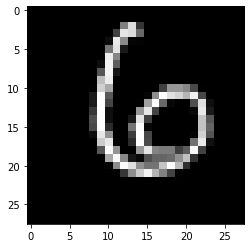

In [ ]:
train_images = X_te[100] / 255
import matplotlib.pyplot as plt
plt.imshow(train_images[:,:,0], cmap='gray')

##Plotting Image no 209 of test dataset:[Misclassified]

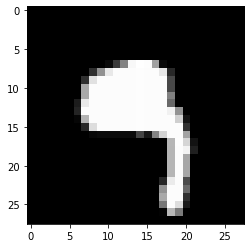

In [ ]:
train_images = X_te[209] / 255
import matplotlib.pyplot as plt
plt.imshow(train_images[:,:,0], cmap='gray')